In [7]:
import pandas as pd
from plotnine import *
import random
import numpy as np
import plotly.express as px
import plotly.offline as py
import plotly.graph_objects as go

# Reading data

In [99]:
df = pd.read_csv('data/preprocessed_data.csv')
df['Age'] = df['�..Age']
df = df.drop('�..Age', axis = 1)
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]
df['Attrition'] = df['Attrition'].apply(lambda x: 0 if x == 'No' else 1)
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,College,Life Sciences,Medium,Female,94,...,Low,0,8,0,Bad,6,4,0,5,1
1,49,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,High,Male,61,...,Very High,1,10,3,Better,10,7,1,7,0
2,37,Travel_Rarely,1373,Research & Development,2,College,Other,Very High,Male,92,...,Medium,0,7,3,Better,0,0,0,0,1
3,33,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,Very High,Female,56,...,High,0,8,3,Better,8,7,3,0,0
4,27,Travel_Rarely,591,Research & Development,2,Below College,Medical,Low,Male,40,...,Very High,1,6,3,Better,2,2,2,2,0


# Heatmap

In [100]:
numerical = [u'Age', u'DailyRate', u'DistanceFromHome', u'HourlyRate', u'JobLevel',
             u'MonthlyIncome', u'MonthlyRate', u'NumCompaniesWorked', u'PercentSalaryHike',
             u'StockOptionLevel', u'TotalWorkingYears', u'TrainingTimesLastYear', u'YearsAtCompany',
             u'YearsInCurrentRole', u'YearsSinceLastPromotion',u'YearsWithCurrManager', u'Attrition']
data = [
    go.Heatmap(
        z=df[numerical].astype(float).corr().values, # Generating the Pearson correlation
        x=df[numerical].columns.values,
        y=df[numerical].columns.values,
        colorscale='Viridis',
        reversescale = False,
#         text = True ,
        opacity = 1.0
    )
]
layout = go.Layout(
    title='Pearson Correlation of numerical features',
    xaxis = dict(ticks='', nticks=36),
    yaxis = dict(ticks='' ),
    width = 900, height = 700,
    
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='labelled-heatmap')

# Outliers

In [101]:
colors = ['#af8dc3', '#7fbf7b','#af8dc3', '#7fbf7b', '#af8dc3', '#7fbf7b','#af8dc3', '#7fbf7b']
names = ['Distance From Home','Num Companies Worked','Percent Salary Hike','Total Working Years','Years At Company','Years In Current Role','Years Since Last Promotion','Years With Curr Manager']
atts = ['DistanceFromHome','NumCompaniesWorked','PercentSalaryHike','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']

In [102]:
fig = go.Figure()
for i in range(len(atts)): 
    fig.add_trace(go.Box(
        x=df[atts[i]],
        name=names[i],
        marker_color=colors[i]
    ))
fig.update_layout(
    xaxis=dict(zeroline=False),
    boxmode='group',
    template="plotly_white",
    showlegend=False
)
fig.update_traces(orientation='h') # horizontal box plots
fig.show()

In [103]:
def iqr_outliers(df, att):
    out = 0
    m = int(np.mean(df[att]))
    q1 = df[att].quantile(0.25)
    q3 = df[att].quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    for i in df[att]:
        if i > Upper_tail or i < Lower_tail:
            out += 1
            df[att] = df[att].replace(i, m)

In [104]:
for att in atts:
    iqr_outliers(df, att)

In [105]:
fig = go.Figure()
for i in range(len(atts)): 
    fig.add_trace(go.Box(
        x=df[atts[i]],
        name=names[i],
        marker_color=colors[i]
    ))
fig.update_layout(
    xaxis=dict( zeroline=False),
    boxmode='group',
    template="plotly_white",
    showlegend=False
)
fig.update_traces(orientation='h') # horizontal box plots
fig.show()

In [106]:
color = '#af8dc3'
att = 'MonthlyIncome'
name ='Monthly Income'

In [107]:
fig = go.Figure()

fig.add_trace(go.Box(
    x=df[att],
    name=name,
    marker_color=color
))
fig.update_layout(
    xaxis=dict( zeroline=False),
    boxmode='group',
    template="plotly_white",
    showlegend=False
)
fig.update_traces(orientation='h') # horizontal box plots
fig.show()

In [108]:
df_copy = df.copy()
iqr_outliers(df_copy, att)

In [109]:
fig = go.Figure()

fig.add_trace(go.Box(
    x=df_copy[att],
    name=name,
    marker_color=color
))
fig.update_layout(
    xaxis=dict(zeroline=False),
    boxmode='group',
    template="plotly_white",
    showlegend=False
)
fig.update_traces(orientation='h') # horizontal box plots
fig.show()

# Search through data

In [121]:
temp_df=df.groupby(['YearsInCurrentRole','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')

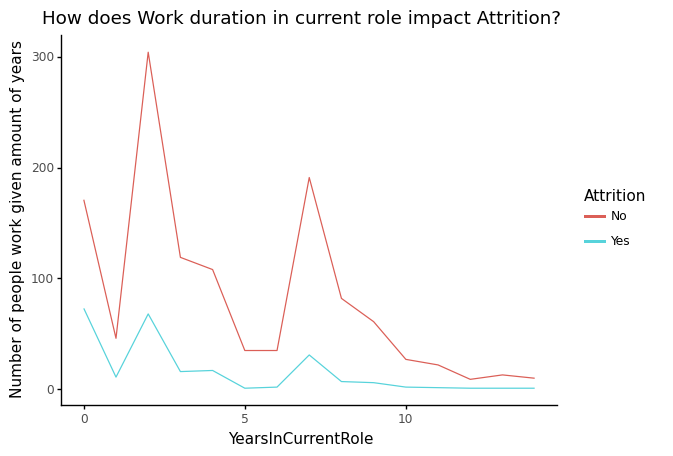

<ggplot: (164758561782)>

In [128]:
(ggplot(temp_df, aes(x='YearsInCurrentRole', y='Counts',color='Attrition'))
    + geom_line()
    + theme_classic()
    + ggtitle("How does Work duration in current role impact Attrition?")
    + ylab("Number of people work given amount of years"))

In [ ]:
['lm', 'ols', 'wls', 'rlm', 'glm', 'gls', 'lowess', 'loess', 'mavg', 'gpr']

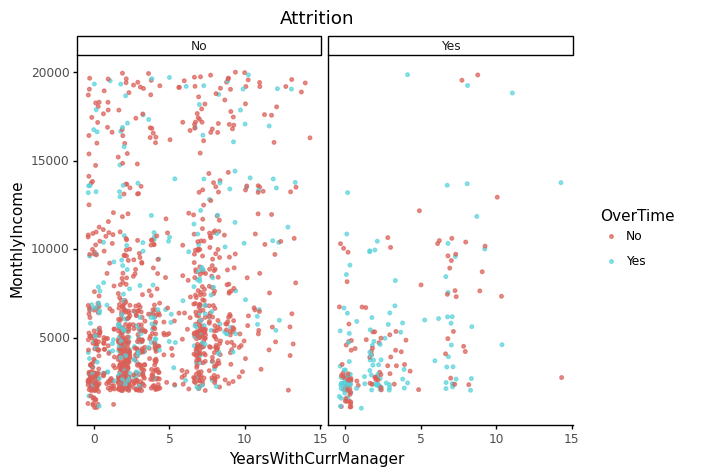

<ggplot: (164758800027)>

In [166]:
(ggplot(df, aes(x='YearsWithCurrManager', y='MonthlyIncome', color='OverTime'))
    + geom_jitter(size = 1, alpha = 0.7)
    + theme_classic()
    + facet_wrap('~ Attrition')
    + ggtitle('Attrition'))

In [110]:
df["AvgWorkingYears"] = df["TotalWorkingYears"]/df["NumCompaniesWorked"]
df.loc[df["NumCompaniesWorked"] == 0, "AvgWorkingYears"] = None
df['Attrition'] = df['Attrition'].apply(lambda x: 'No' if x == 0 else 'Yes')

C:\Users\Krul\Anaconda3\lib\site-packages\plotnine\layer.py:401: PlotnineWarning:

geom_point : Removed 197 rows containing missing values.



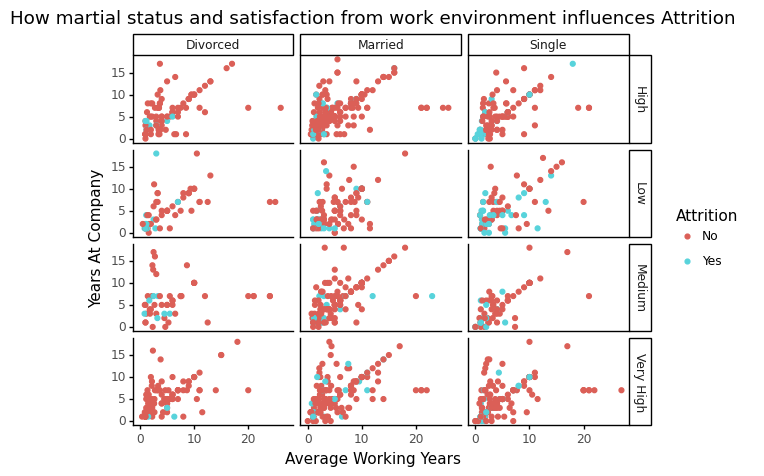

<ggplot: (-9223371872096074401)>

In [117]:
(ggplot(df, aes(x='AvgWorkingYears', y = 'YearsAtCompany', color = 'Attrition')) 
     + geom_point() 
     + facet_grid('EnvironmentSatisfaction~MaritalStatus')
     + theme_classic()
     + labs(title = 'How martial status and satisfaction from work environment influences Attrition', x='Average Working Years', y='Years At Company'))

In [169]:
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]

['AvgWorkingYears',
 'Age',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'Attrition']

In [171]:
df.to_csv('data_outliers.csv', index = False)